In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_12552/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [17]:
x = np.array (list (range (16))) - 5
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
y = list (map (float, input().split()))
y

[0.8,
 1.4,
 1.72,
 2.05,
 2.41,
 2.73,
 3.03,
 3.37,
 3.69,
 4.03,
 4.36,
 4.66,
 4.98,
 5.3,
 5.64,
 5.94]

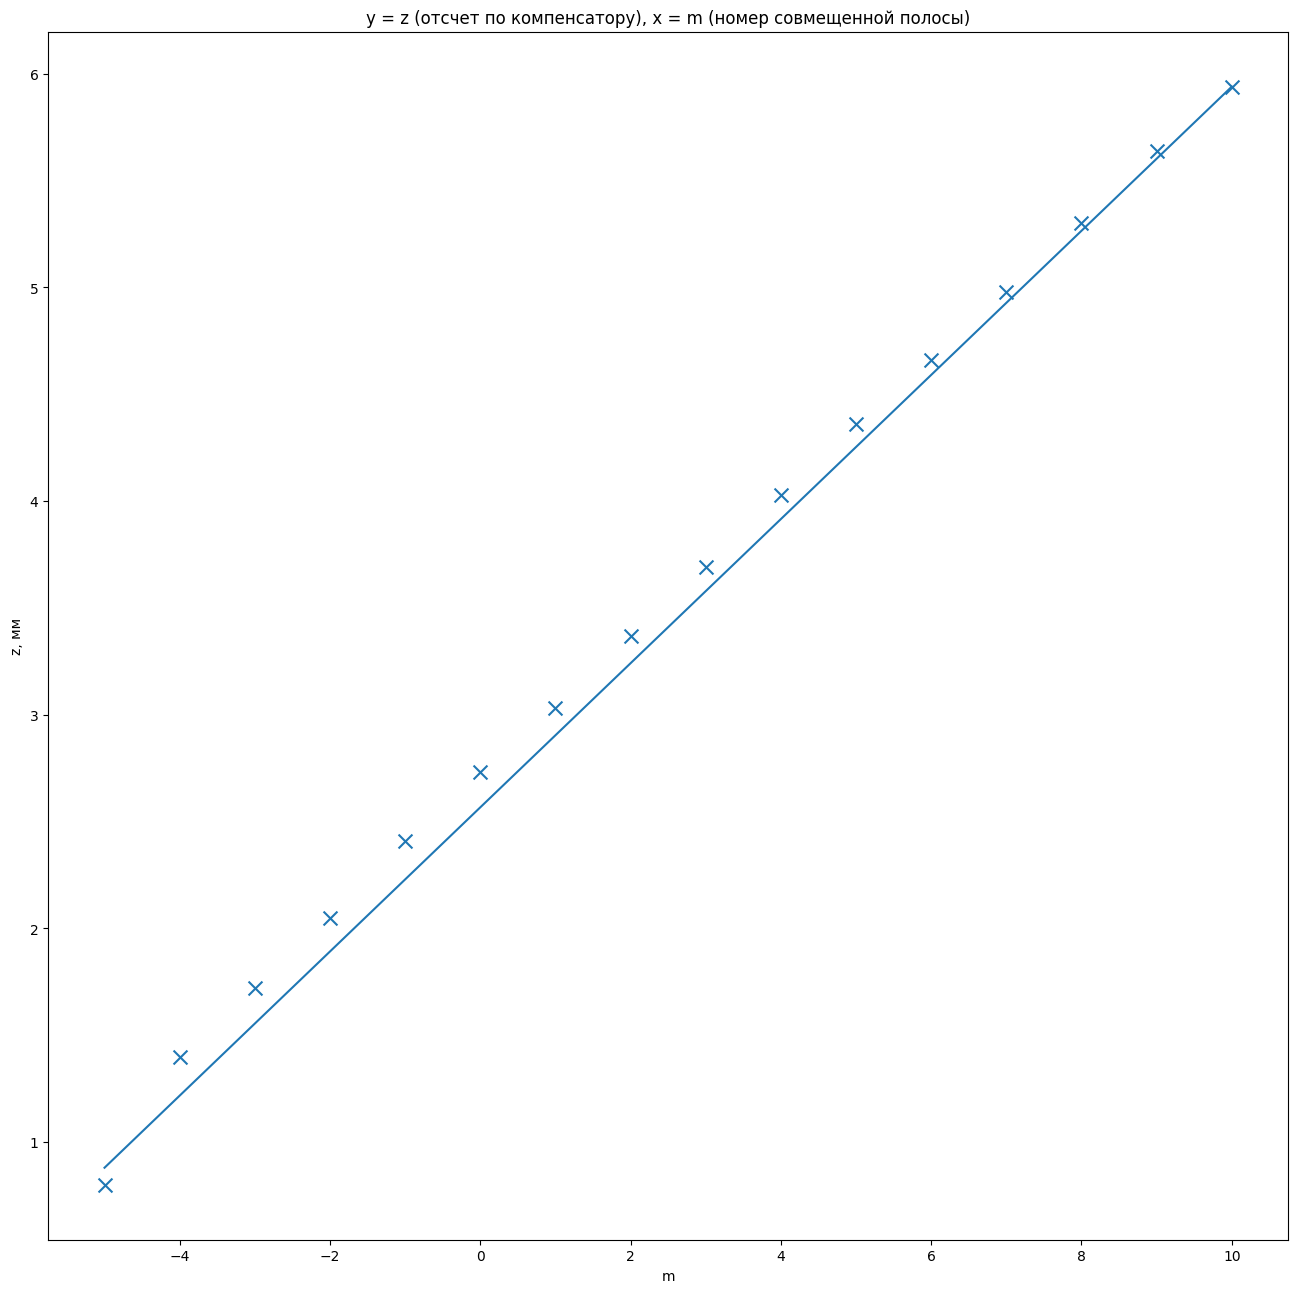

In [46]:
fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("y = z (отсчет по компенсатору), x = m (номер совмещенной полосы)")

ax1.set_ylabel ("z, мм") 
ax1.set_xlabel ("m")

ax1.scatter (x, y, marker="x", s = 100)
ax1.plot ([x[0], x[-1]], [y[0] * 1.1, y[-1]])

plt.savefig("picturies/graph1.png", dpi=100)
plt.show()

In [39]:
lam = 6.7 # * 10^-7 м
l = 0.1 # м
T = 22.2
P = 100.2 * 10 ** 3

In [12]:
dP = list (map (float, input().split()))

In [31]:
dP = np.array (dP)

In [32]:
dP = -dP
dP

array([ 1000.,   900.,   800.,   700.,   600.,   500.,   400.,   300.,
         200.,   100.,    -0.,  -100.,  -200.,  -300.,  -400.,  -500.,
        -600.,  -700.,  -800.,  -900., -1000.])

In [19]:
z1 = np.array (list (map (float, input().split())))

In [20]:
z1

array([4.07, 3.92, 3.74, 3.65, 3.54, 3.45, 3.23, 3.14, 3.  , 2.86, 2.76,
       2.55, 2.46, 2.36, 2.19, 1.99, 1.86, 1.72, 1.53, 1.29, 1.03])

In [21]:
m1 = (z1 - y[0] * 1.1) / (y[-1] - y[0]) * (x[-1] - x[0]) + x[0]
m1

array([ 4.30933852,  3.87159533,  3.3463035 ,  3.08365759,  2.76264591,
        2.5       ,  1.85797665,  1.59533074,  1.18677043,  0.77821012,
        0.48638132, -0.12645914, -0.38910506, -0.68093385, -1.1770428 ,
       -1.76070039, -2.14007782, -2.54863813, -3.10311284, -3.80350195,
       -4.56225681])

In [44]:
x1 = m1 * lam / l # в 10^-7 
x1 = x1 / 10 ** 2 # в 10^-5 
x1

array([ 2.88725681,  2.59396887,  2.24202335,  2.06605058,  1.85097276,
        1.675     ,  1.24484436,  1.0688716 ,  0.79513619,  0.52140078,
        0.32587549, -0.08472763, -0.26070039, -0.45622568, -0.78861868,
       -1.17966926, -1.43385214, -1.70758755, -2.0790856 , -2.5483463 ,
       -3.05671206])

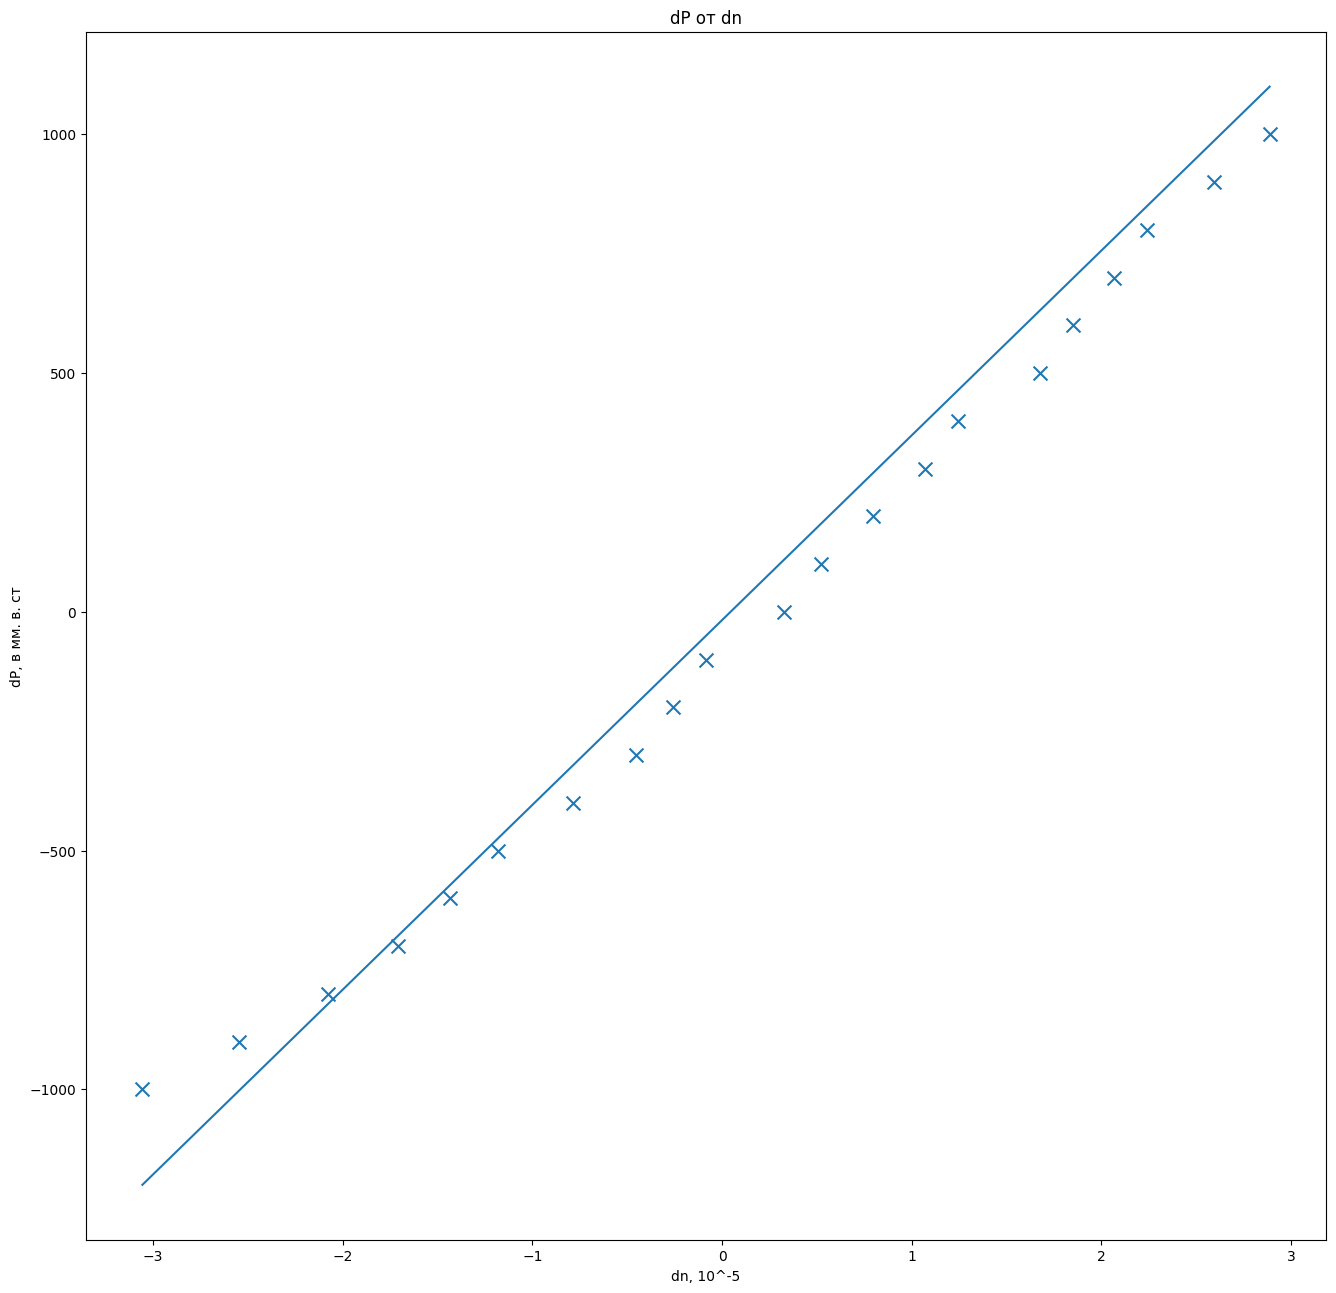

In [34]:
fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("dP от dn")

ax1.set_ylabel ("dP, в мм. в. ст") 
ax1.set_xlabel ("dn, 10^-5")

ax1.scatter (x1, dP, marker="x", s = 100)
ax1.plot ([x1[0], x1[-1]], [1.1 * dP[0], 1.2 * dP[-1]])

plt.savefig("picturies/graph2.png", dpi=100)
plt.show()

In [37]:
alpha = (x1[-1] - x1[0]) / (dP[-1] * 1.2 - dP[0] * 1.1) * 1.38 * (T + 273) / (2 * np.pi) # * 10^-29
alpha

0.16755765031057898

In [41]:
n = 1 + 2 * np.pi * alpha * P / (1.38 * (T + 273)) * 10 ** (-6)
n

1.0002589502960582

In [42]:
n0 = 1 + (T + 273) * 10 ** 5 / (233 * P) * (n - 1)
n0

1.0003274229540762

In [47]:
z2 = 9.9

In [48]:
m2 = (z2 - y[0] * 1.1) / (y[-1] - y[0]) * (x[-1] - x[0]) + x[0]
m2

21.322957198443575

In [50]:
dn2 = m2 * lam / (l * 10 ** 2) # 10^-5
dn2

14.286381322957194

In [51]:
n_co2 = n + dn2 / 10 ** 5
n_co2

1.0004018141092876

In [52]:
n_co20 = 1 + (T + 273) * 10 ** 5 / (233 * P) * (n_co2 - 1)
n_co20

1.0005080633799428